<a href="https://colab.research.google.com/github/Williansom/volta-zero/blob/main/segmentacao_clientes_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neste notebook iremos realizar uma segmentação de clientes com o dataset do kaggle disponível em https://www.kaggle.com/datasets/lakshmi25npathi/online-retail-dataset.

Para isso usaremos o algoritmos **Kmeans** .

Para um conjunto de clientes, queremos segmentá-los de acordo com propriedades numéricas (quantidade de receita que eles trazem para nossa empresa, tempo de consumo dos nossos serviços, etc..)


Quanto mais para cima o ponto, maior a receita que o cliente traz para a nossa empreza
Quanto mais para a direita o ponto, maior o tempo de casa do cliente
Será que o desconto que eu oferto para um cliente novo 
 e que traz pouca receita deve ser o mesmo desconto que eu dou para um cliente antigo e que traz muita receita?


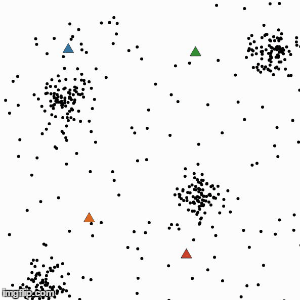

In [ ]:
print("Quanto mais para cima o ponto, maior a receita que o cliente traz para a nossa empreza")
print("Quanto mais para a direita o ponto, maior o tempo de casa do cliente")
print("Será que o desconto que eu oferto para um cliente novo \n e que traz pouca receita deve ser o mesmo desconto que eu dou para um cliente antigo e que traz muita receita?")
from IPython.display import Image
Image(open('Kmeans_animation.gif','rb').read())

Faremos algo  similar com um dataset de vendas do Kaggle.

**1. Importando o arquivo csv**

Baixamos o arquivo .xlsx da base, e demos o upload no ambiente do colab. 

Podemos usar  o módulo pandas para poder ler o arquivo.

Trata-se de um arquivo com dados de produtos vendidos em uma loja online.

In [ ]:
import pandas as pd

df = pd.read_csv('online_retail.csv') # armazenando a tabela na variável df

df.head(5) # exibindo as primeiras 5 linhas da tabela


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


tipos de dados:

In [ ]:
df.dtypes # olhando os tipos de dados de cada coluna

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

InvoiceNo: Número da fatura

StockCode: Identificador dos itens da compra

Description: descrição dos itens da compra

Quantity: quantidade do item que foi comprado

InvoiceDate: data da compra

UnitPrice: valor de cada item

CustomerID: identificador do cliente **(TEM QUE SER TRANSFORMADO NO TIPO OBJETO OU CATEGORIA)**

Country: país do cliente

In [ ]:
df['CustomerID'] = df['CustomerID'].astype('object') # o tipo category economiza memória na maioria das vezes

In [ ]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

**2.Olhando um breve descritivo dos dados da tabela**



In [ ]:
df.describe(include='all') # colocar include= all traz as variáveis numéricas e categóricas

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.0,541909
unique,25900,4070,4223,NaN,23260,NaN,4372.0,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/11 14:41,NaN,17841.0,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,7983.0,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,NaN,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,NaN,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,NaN,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,NaN,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,NaN,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,NaN,NaN


Essa primeira análise serve para notar as coisas estranhas que temos na tabela. 
Temos dados com quantidade e preço unitário negativo, isso pode ter sido um problema na captação de dado e deve ser retirado. Linhas onde alguma coluna tem valor nulo também podem ser retiradas.

**3. Tratando a base**



*   Retirar linhas onde o preço ou quantidade são negativas ou igual a zero
*   Retirar linhas onde alguma variável é nula
*   Remover linhas duplicadas



In [ ]:
df1 = df.drop_duplicates()
df2 = df1.dropna()
df3 = df2.loc[(df2['Quantity']>0) & (df2['UnitPrice']>0)]

Olhando a nova base tratada:

In [ ]:
df3.describe(include ='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,392692,392692,392692,392692.000000,392692,392692.000000,392692.0,392692
unique,18532,3665,3877,NaN,17282,NaN,4338.0,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,11/14/11 15:27,NaN,17841.0,United Kingdom
freq,542,2023,2016,NaN,542,NaN,7676.0,349203
mean,NaN,NaN,NaN,13.119702,NaN,3.125914,NaN,NaN
std,NaN,NaN,NaN,180.492832,NaN,22.241836,NaN,NaN
min,NaN,NaN,NaN,1.000000,NaN,0.001000,NaN,NaN
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,NaN,NaN
50%,NaN,NaN,NaN,6.000000,NaN,1.950000,NaN,NaN
75%,NaN,NaN,NaN,12.000000,NaN,3.750000,NaN,NaN


Repare que o valor 'top'  e 'freq' não são definidos para as variáveis numéricas, e as métricas de média, desvio padrão , máximos e mínimos não são definidas para as variáveis numéricas.  

**Top** é o valor que mais se repete, e **freq** é a quantidade de vezes que esse valor aparece.

Já podemos dizer que tivemos mais vendas no UK.

Perdemos uma massa de dados após retirar linhas com dados nulos, isso pode ser calculado com a diferença entre o tamanho do dataframe inical e o tamanho do dataframe tratado:

In [ ]:
print("linhas do dataframe inicial : {} \n".format(df.shape[0])+
      "linhas do dataframe final : {} \n".format(df3.shape[0]) +
      "linhas excluídas: {}".format(df.shape[0] - df3.shape[0]))

linhas do dataframe inicial : 541909 
linhas do dataframe final : 392692 
linhas excluídas: 149217


**4. Análise exploratória de dados facilitada**

Para olhar as distribuições dos dados categóricos, vamos instalar a bilbioteca sweetviz:

In [ ]:
pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sweetviz as sv
analyze_report = sv.analyze(df3)
analyze_report.show_html('analyze.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report analyze.html was generated.



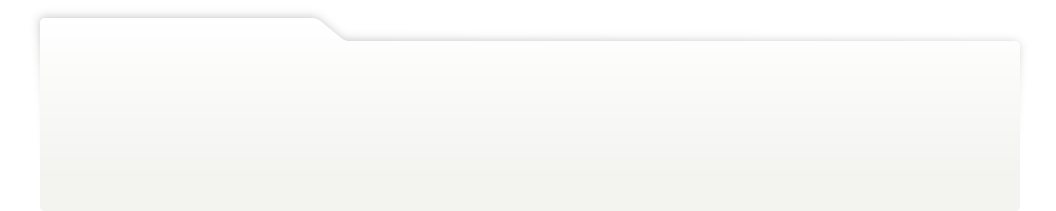
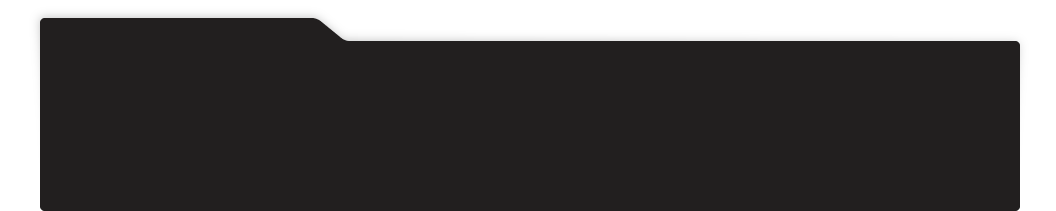
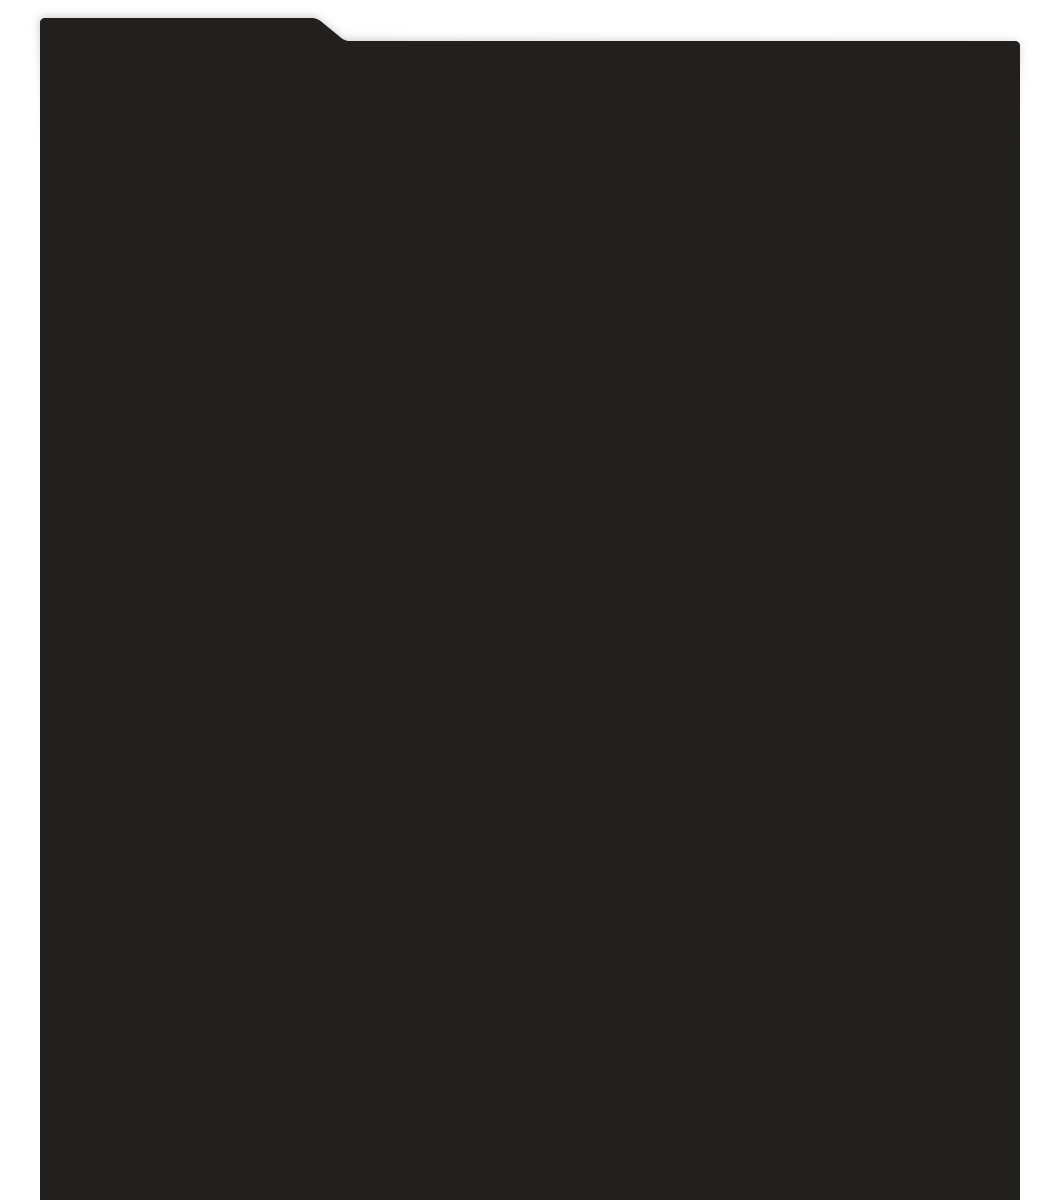
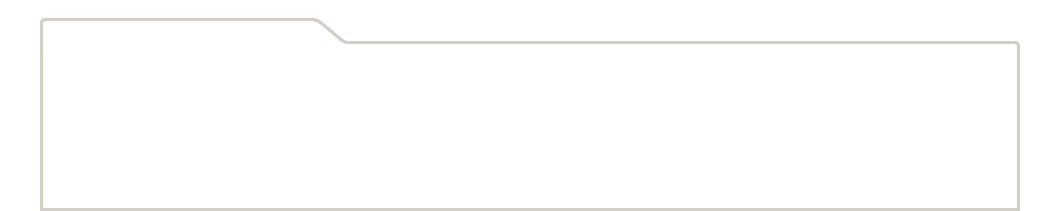
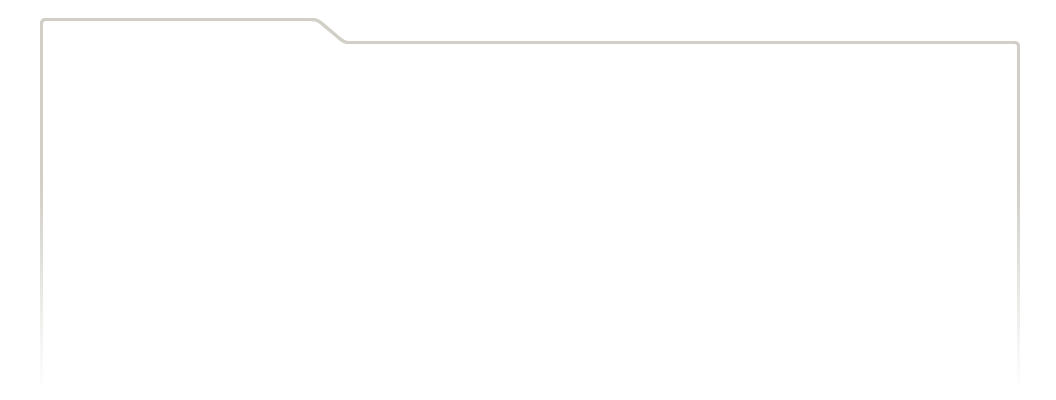
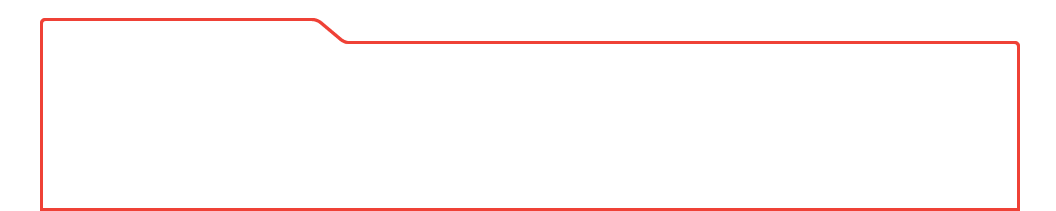
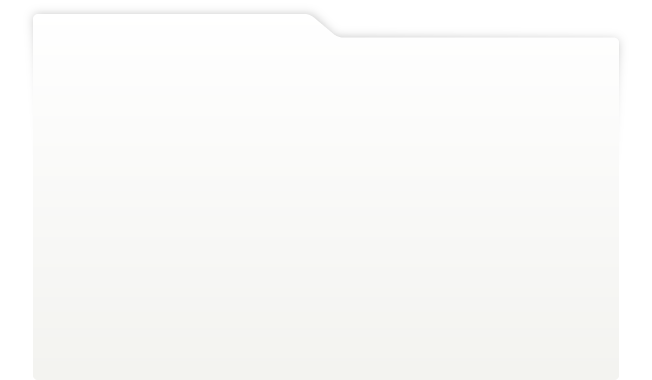
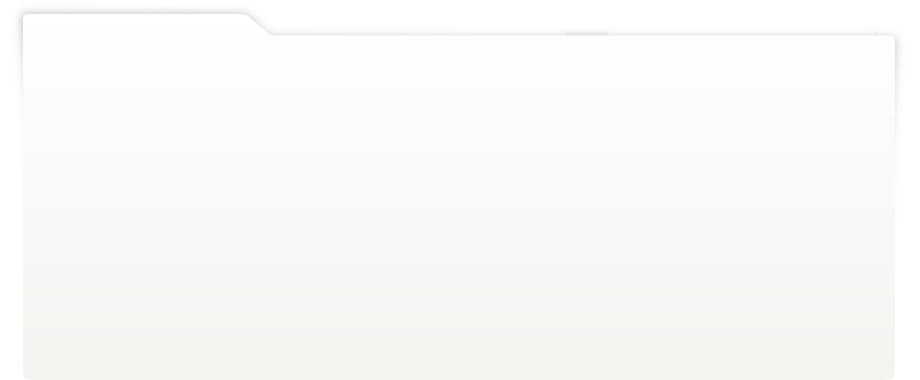
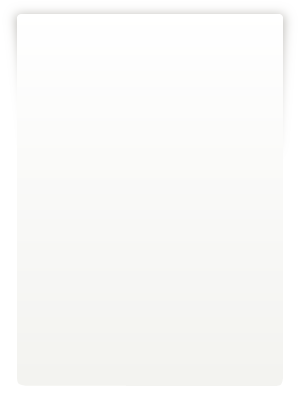
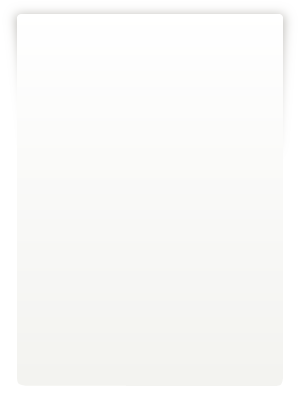
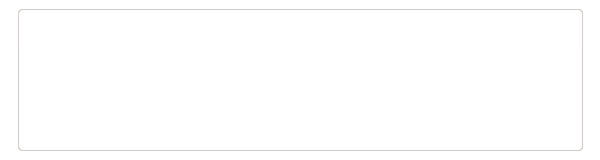
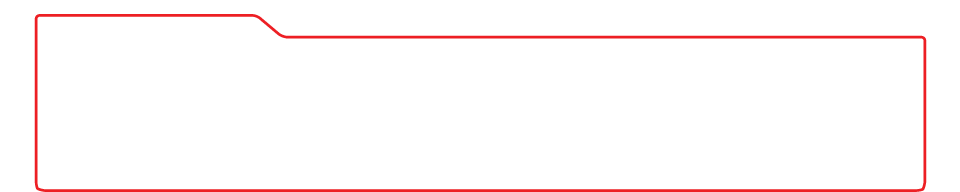
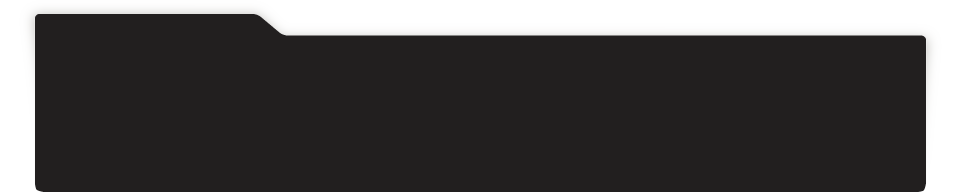
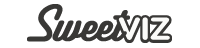
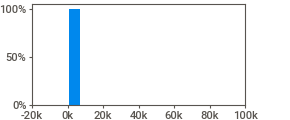
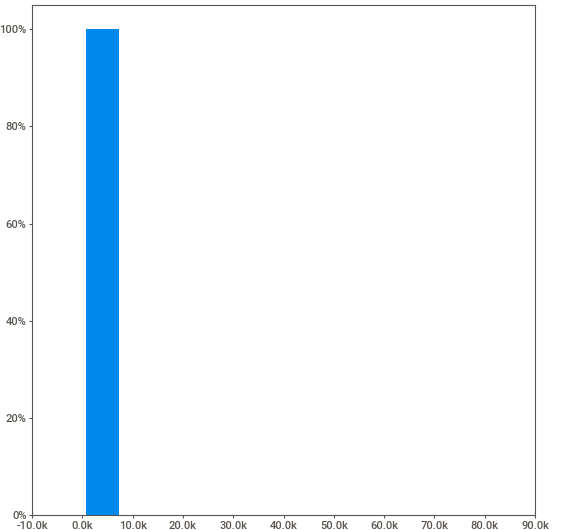
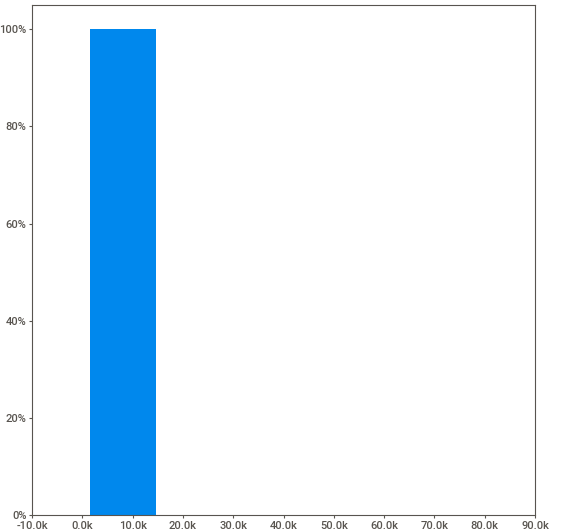
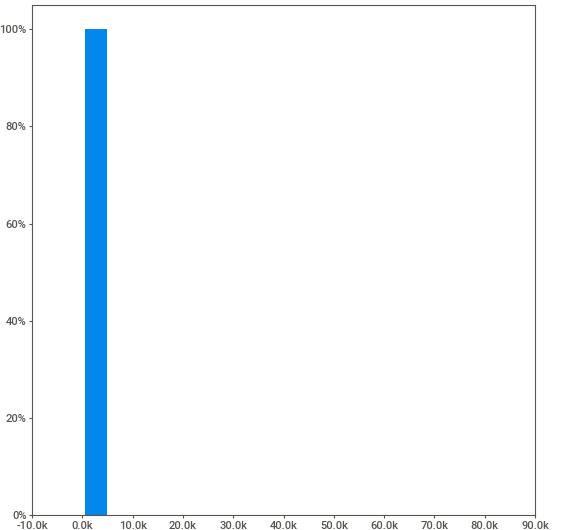
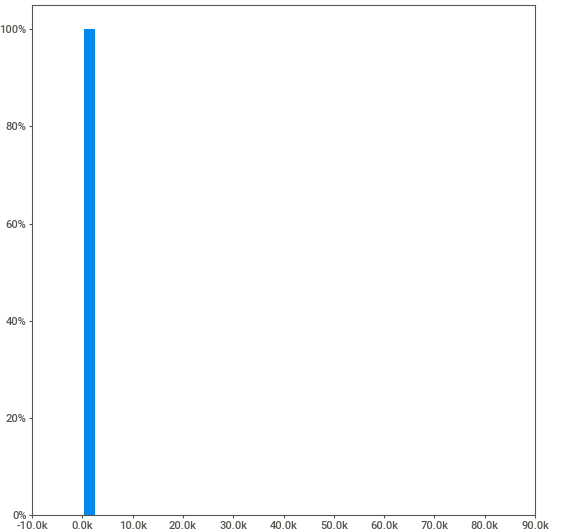
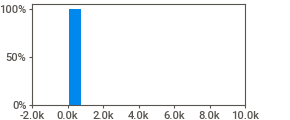
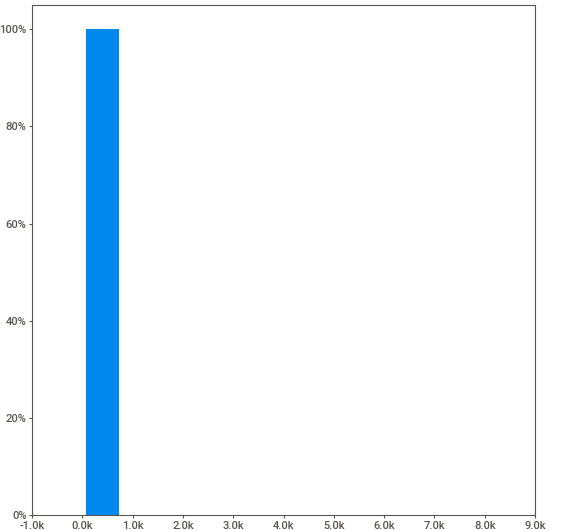
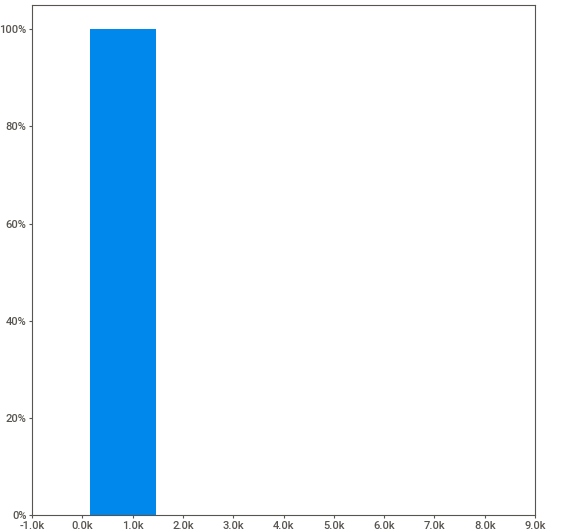
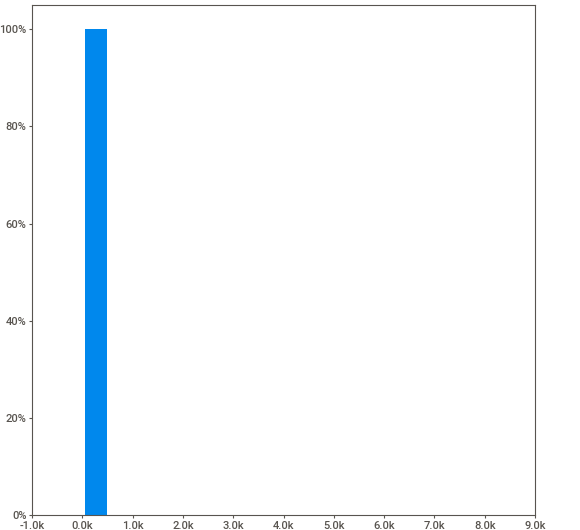
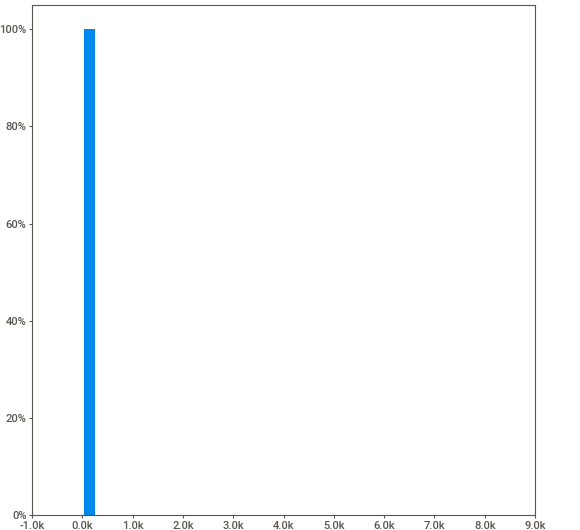
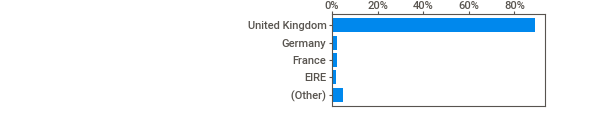
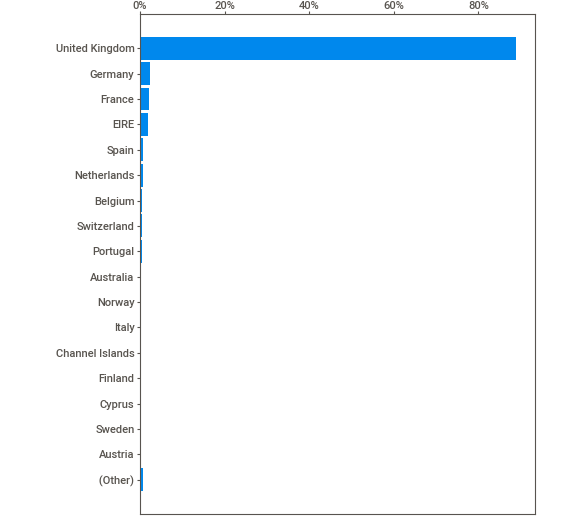
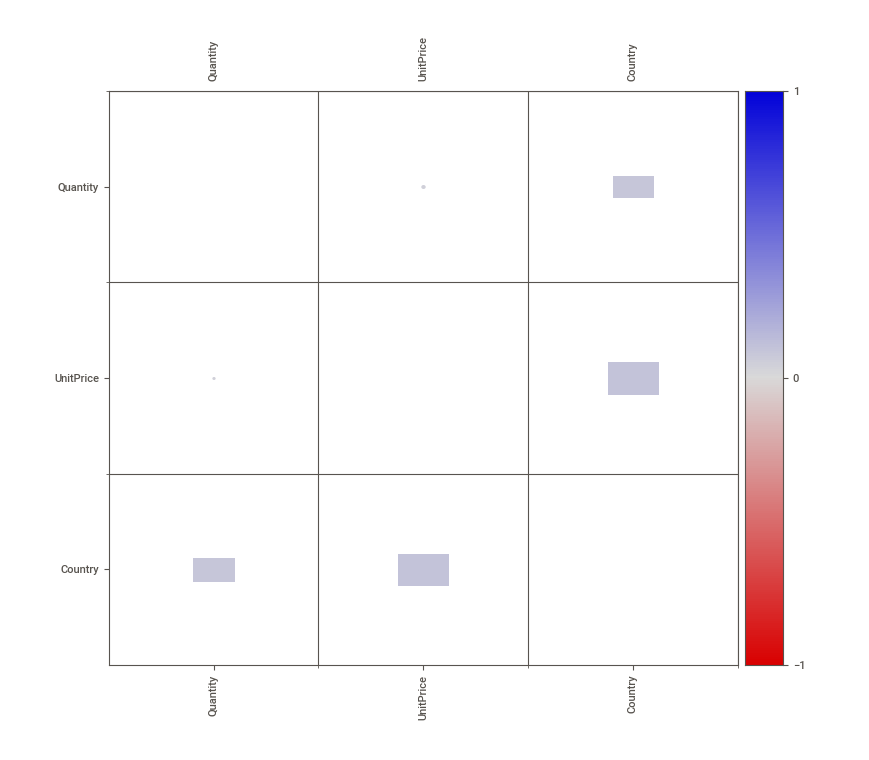
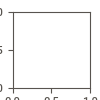

In [ ]:
import IPython  #para gerar o html com a visualização
IPython.display.HTML('analyze.html')

Vemos que os top 5 países dos clientes são:

* UK
* Alemanha
* França
* Irlanda

**5. Olhando a receita total obtida em cada país**

Vamos criar uma nova coluna multiplicando a quantidade de itens vendidos pelo preço unitário, obtendo o valor total da venda para aquele produto.

Depois vamos somar os valores das vendas para cada país. 

In [ ]:
df3['num_total_sale'] = df3['UnitPrice']*df3['Quantity']

<ipython-input-24-aecc19ca57b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['num_total_sale'] = df3['UnitPrice']*df3['Quantity']


In [ ]:
df3

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,num_total_sale
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France,16.60


In [ ]:
groupby_sales_country = df3.groupby('Country').num_total_sale.sum()

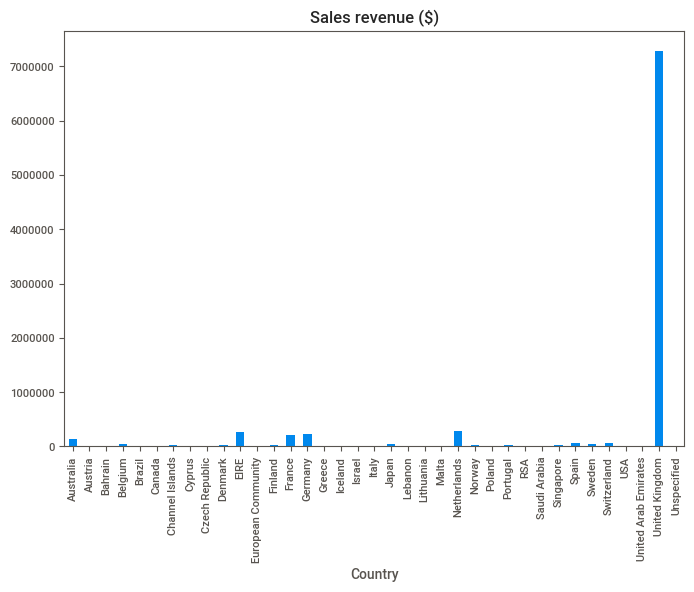

In [ ]:
groupby_sales_country.plot(kind = 'bar', title = 'Sales revenue ($)')

**6. Preparando a base para rodar o modelo de segmentação (K-means)**

Com base nos nossos dados, podemos fazer uma segmentação de **RFM (Recência, Frequência e Valor Monetário)**


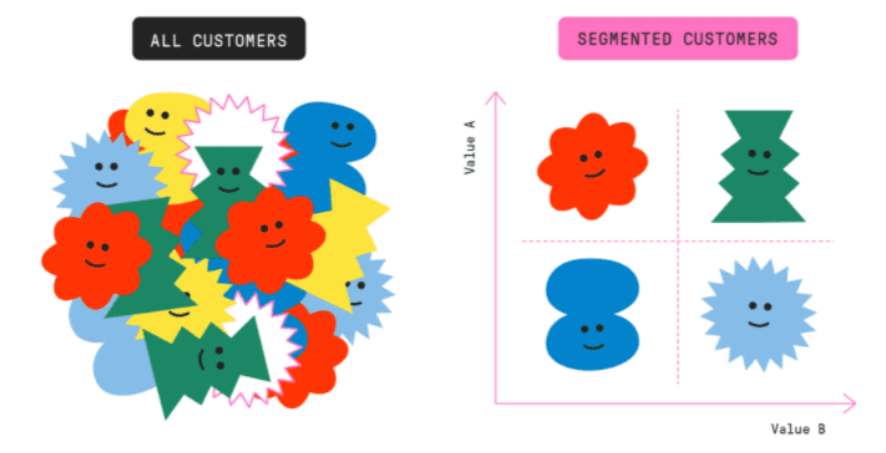

 imagem de: https://www.barilliance.com/rfm-analysis/#:~:text=RFM%20analysis%20is%20a%20data,much%20they've%20spent%20overall.


Vamos trabalhar com as colunas: 
* CustomerID
* num_total_sale (valor monetário)
* Invoice date
* InvoiceNo

Precisamos definir qual a faixa de tempo que usaremos.

In [ ]:
df3['InvoiceDate'] = pd.to_datetime(df3['InvoiceDate'])

<ipython-input-234-9f0a3c54eddb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['InvoiceDate'] = pd.to_datetime(df3['InvoiceDate'])


Olhando a data máxima e mínima:

In [ ]:
global max_period_purchase
print(max(df3['InvoiceDate']))
print(min(df3['InvoiceDate']))

2011-12-09 12:50:00
2010-12-01 08:26:00


Temos mais de um ano de dados, vamos eliminar os dados  depois de 2011-12-01 para ficar com dados de um ano apenas.

In [ ]:
df4 = df3.loc[df3['InvoiceDate'] <  pd.to_datetime('2011-12-02 00:00:00') ]

In [ ]:
print(max(df4['InvoiceDate']))
print(min(df4['InvoiceDate']))

2011-12-01 19:54:00
2010-12-01 08:26:00


In [ ]:
df4

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,num_total_sale,InvoiceDateDays
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
...,...,...,...,...,...,...,...,...,...,...
519280,580137,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,1,2011-12-01 19:54:00,2.55,17566.0,United Kingdom,2.55,2011-12-01
519281,580137,23272,TREE T-LIGHT HOLDER WILLIE WINKIE,1,2011-12-01 19:54:00,1.65,17566.0,United Kingdom,1.65,2011-12-01
519282,580137,23490,T-LIGHT HOLDER HANGING LOVE BIRD,1,2011-12-01 19:54:00,3.75,17566.0,United Kingdom,3.75,2011-12-01
519283,580137,23553,LANDMARK FRAME CAMDEN TOWN,2,2011-12-01 19:54:00,12.50,17566.0,United Kingdom,25.00,2011-12-01


Supodo que estejamos olhando os dados em janeiro de 2012, vamos criar uma coluna com o dia desde a venda:

In [ ]:
from datetime import date
df4['days_since_purchase'] = df4['InvoiceDate'].apply(lambda x: (datetime(2012,1,1,0,0,0) - x).days)

<ipython-input-249-bc4889278ba6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['days_since_purchase'] = df4['InvoiceDate'].apply(lambda x: (datetime(2012,1,1,0,0,0) - x).days)


In [ ]:
df4

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,num_total_sale,InvoiceDateDays,days_since_purchase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,395
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,395
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,395
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,395
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,395
...,...,...,...,...,...,...,...,...,...,...,...
519280,580137,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,1,2011-12-01 19:54:00,2.55,17566.0,United Kingdom,2.55,2011-12-01,30
519281,580137,23272,TREE T-LIGHT HOLDER WILLIE WINKIE,1,2011-12-01 19:54:00,1.65,17566.0,United Kingdom,1.65,2011-12-01,30
519282,580137,23490,T-LIGHT HOLDER HANGING LOVE BIRD,1,2011-12-01 19:54:00,3.75,17566.0,United Kingdom,3.75,2011-12-01,30
519283,580137,23553,LANDMARK FRAME CAMDEN TOWN,2,2011-12-01 19:54:00,12.50,17566.0,United Kingdom,25.00,2011-12-01,30


Definimos que: 


* A análise será de um dano de dados, de 2010-12-01 a 2011-12-01.
* Teremos a quantidade de dias desde a compra mais recente. 
* O total comprado de cada cliente será somado ao longo do ano inteiro 
* A quantidade de compras é a soma da quantidade de faturas diferentes para um cliente ao longo do ano

Como iremos analisar os clientes, a **granularidade do dado é o cliente** e o que ele fez ao longo do ano.

Esperamos uma tabela final  com uma linha por cliente.

Criando agrupamentos de total comprado ao longo do ano, quantidade de compras ao longo do ano, e dia da compra mais recente.

In [ ]:
num_total_sale_groupby_client = df4.groupby('CustomerID').num_total_sale.sum().reset_index()

In [ ]:
num_total_sale_groupby_client.head()

,CustomerID,num_total_sale
0,12346.0,77183.60
1,12347.0,4085.18
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [ ]:
amount_sale_groupby_client = df4.groupby('CustomerID').InvoiceNo.size().reset_index() #não somamos o número das fatura, contamos o tamanho da lista de faturas para cada cliente

In [ ]:
last_sale_groupby_client = df4.groupby('CustomerID').days_since_purchase.max().reset_index()

In [ ]:
last_sale_groupby_client.head()

,CustomerID,InvoiceDateDays
0,12346.0,2011-01-18
1,12347.0,2011-10-31
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


Como temos uma linha por cliente nos três agrupamentos, espera-se que a quantidade de clientes distintos em df4 seja o tamanho dos três agrupamentos

In [ ]:
total_clients = len(df4['CustomerID'].unique()) # quantos elementos tem na lista que contém os clientes distintos

In [ ]:
print(len(last_sale_groupby_client), len(amount_sale_groupby_client), len(num_total_sale_groupby_client))

4300 4300 4300


Juntando os agrupamentos em um novo dataframe, usando o CustomerID como chave

In [ ]:
merge1 =  pd.merge(last_sale_groupby_client, amount_sale_groupby_client,  how = 'left', on= 'CustomerID')
df5 = pd.merge(merge1,  num_total_sale_groupby_client, how = 'left', on= 'CustomerID')

In [ ]:
df5 = df5.rename(columns = {'InvoiceNo': 'amount_purchase_events'})

In [ ]:
df5.head()

,CustomerID,days_since_purchase,amount_purchase_events,num_total_sale
0,12346.0,347,1,77183.60
1,12347.0,389,171,4085.18
2,12348.0,380,31,1797.24
3,12349.0,40,73,1757.55
4,12350.0,332,17,334.40


Importando os módulos necessários

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

É importante reduzir a faixa dos valores numéricos, para isso usamos  a normalização. Colocamos os valores na faixa entre zero e 1.

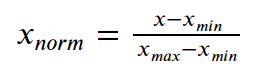

In [ ]:
global max_amount_purchase_events, min_amount_purchase_events, max_num_total_sale, min_num_total_sale , max_days_since_purchase, min_days_since_purchase
max_amount_purchase_events = max(df5['amount_purchase_events'])
min_amount_purchase_events = min(df5['amount_purchase_events'])

max_num_total_sale=max(df5['num_total_sale'])
min_num_total_sale= min(df5['num_total_sale'])

max_days_since_purchase  =max(df5['days_since_purchase'])
min_days_since_purchase = min(df5['days_since_purchase'])




In [ ]:
df5['std_amount_purchase_events'] = df5['amount_purchase_events'].apply(lambda x: (x-min_amount_purchase_events)/(max_amount_purchase_events- min_amount_purchase_events))

In [ ]:
df5['std_num_total_sale'] = df5['num_total_sale'].apply(lambda x: (x-min_num_total_sale)/(max_num_total_sale- min_num_total_sale))

In [ ]:
df5['std_days_since_purchase'] = df5['days_since_purchase'].apply(lambda x: (x-min_days_since_purchase)/(max_days_since_purchase- min_days_since_purchase))

A princípio o código de refência do cliente não impacta na sua segmentação. Vamos remover as colunas desnecessárias:

In [ ]:
df6 = df5[['std_days_since_purchase','std_num_total_sale', 'std_amount_purchase_events']]

In [ ]:
df6.head()

,std_days_since_purchase,std_num_total_sale,std_amount_purchase_events
0,0.868493,0.287478,0.000000
1,0.983562,0.015205,0.023186
2,0.958904,0.006683,0.004092
3,0.027397,0.006536,0.009820
4,0.827397,0.001235,0.002182


Abaixo importamos os módulos necessários para rodar o modelo Kmeans, e descobrir os clusters de clientes. Precisamos começar com um tamanho inicial de clusters, para simplificar aqui escolhemos 3. Existem métodos para escolher corretamente a quantidade de clusters, para saber mais entrar em: 
https://www.analyticsvidhya.com/blog/2021/04/k-means-clustering-simplified-in-python/

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

sns.set()
kmeans = KMeans(3)
kmeans.fit(df6)

KMeans(n_clusters=3)

In [ ]:
identified_clusters = kmeans.fit_predict(df6)
identified_clusters

array([0, 0, 0, ..., 1, 0, 2], dtype=int32)

Abaixo visualizamos em 3D a segmentação para cada um dos três clusters.

In [ ]:
import plotly.express as px

data_with_clusters = df6.copy()
data_with_clusters['Clusters'] = identified_clusters 
px.scatter_3d(x = "std_days_since_purchase", y = "std_num_total_sale",z = "std_amount_purchase_events", data_frame= data_with_clusters, color= 'Clusters')

**Conclusão**

Realizamos a sagmentação dos clientes com três clusters , dentro do conceito de 
RFM (Recência, Frequência e Valor Monetário).

A análise mostra que o eixo que mais afeta a segmentação é a recência, traduzida na análise como a variável 'std_days_since_purchase', dias desde a última compra. 